In [55]:
import time
import random

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [3]:
data_df = pd.read_pickle("data_df_finalV2.pkl")
data_df.head()

,index,id,headline,article,category,url,author,timestamp,source_url,source_url_base,source_article,source_article_dict,source_article_len
0,24823,1503649654769,I once caught woman filming me while I slept o...,Actress Neha Dhupia said she once caught a wom...,entertainment,https://inshorts.com/prev/en/news/i-once-caugh...,Prashanti Moktan,2017-08-25 08:27:34.000Z,http://www.hindustantimes.com/bollywood/neha-d...,www.hindustantimes.com,Neha Dhupia: I once caught a woman filming me ...,{'story_highlight': 'Neha Dhupia: I once caugh...,579
1,313,1517724052573,The nation is obsessed with Big B: Pad Man dir...,"Filmmaker R Balki, while talking about Amitabh...",entertainment,https://inshorts.com/prev/en/news/the-nation-i...,Mriganka Sen,2018-02-04 06:00:52.000Z,https://www.hindustantimes.com/bollywood/natio...,www.hindustantimes.com,‘Nation is obsessed with Amitabh Bachchan’: R ...,{'story_highlight': '‘Nation is obsessed with ...,546
2,15506,1471546262255,NASA plans to sell the ISS by mid-2020s,US space agency NASA plans to hand over contro...,science,https://inshorts.com/prev/en/news/nasa-plans-t...,Satyaki Das,2016-08-18 18:51:02.255Z,https://techcrunch.com/2016/08/18/nasa-hopes-t...,techcrunch.com,NASA hopes to hand the International Space Sta...,{'headline': 'NASA hopes to hand the Internati...,313
3,18010,1527768206107,We've known each other for long: Nidhhi on rum...,"'Munna Michael' actress Nidhhi Agerwal, while ...",entertainment,https://inshorts.com/prev/en/news/weve-known-e...,Daisy Mowke,2018-05-31 12:03:26.000Z,https://www.crictracker.com/nidhhi-agerwal-qua...,www.crictracker.com,We have known each other since our teenage yea...,{'headline': 'We have known each other since o...,334
4,260,1546270256685,MIT scientists develop new 3D-printing system ...,"MIT scientists have developed a new system, G3...",technology,https://inshorts.com/prev/en/news/mit-scientis...,Arundhati Rawat,2018-12-31 15:30:56.000Z,https://techcrunch.com/2018/12/31/mit-research...,techcrunch.com,MIT researchers are now 3D-printing glass\nWhi...,"((headline, MIT researchers are now 3D-printin...",250


In [31]:
print(data_df.shape)
print(data_df.columns)

data_df[['id','headline','category','source_url_base', 'source_article', 'source_article_len']].head(20)

(16705, 13)
Index(['index', 'id', 'headline', 'article', 'category', 'url', 'author',
       'timestamp', 'source_url', 'source_url_base', 'source_article',
       'source_article_dict', 'source_article_len'],
      dtype='object')


,id,headline,category,source_url_base,source_article,source_article_len
0,1503649654769,I once caught woman filming me while I slept o...,entertainment,www.hindustantimes.com,Neha Dhupia: I once caught a woman filming me ...,579
1,1517724052573,The nation is obsessed with Big B: Pad Man dir...,entertainment,www.hindustantimes.com,‘Nation is obsessed with Amitabh Bachchan’: R ...,546
2,1471546262255,NASA plans to sell the ISS by mid-2020s,science,techcrunch.com,NASA hopes to hand the International Space Sta...,313
3,1527768206107,We've known each other for long: Nidhhi on rum...,entertainment,www.crictracker.com,We have known each other since our teenage yea...,334
4,1546270256685,MIT scientists develop new 3D-printing system ...,technology,techcrunch.com,MIT researchers are now 3D-printing glass\nWhi...,250
5,1456054476085,Japan launches new space observatory ASTRO-H,science,techcrunch.com,Japan Launches Observatory To Study Black Hole...,459
6,1526036398434,BJP leader tweets pic of inverse flag at AAP m...,politics,www.timesnownews.com,‘Show respect to Tricolour’: BJP leader tweets...,370
7,1543491483483,Sidhu gets more love in Pakistan than India: H...,politics,www.timesnownews.com,Navjot Singh Sidhu has more love and respect i...,365
8,1517124866867,Kalpana Chawla inspired women all over the wor...,science,www.hindustantimes.com,Mann Ki Baat highlights: PM Modi focuses on Na...,779
9,1527960743229,IKEA to enter India with first physical store ...,business,www.hindustantimes.com,"Ikea to enter Indian market in July, may trigg...",468


In [5]:
# articles not fetched
print(data_df[data_df['source_article']=='NA'].shape)
data_df[data_df['source_article']=='NA'][['id','headline','category','source_url_base', 'source_article']]

(0, 13)


,id,headline,category,source_url_base,source_article


In [19]:
# category count
data_df['category'].value_counts()

entertainment    4101
business         2855
politics         2755
sports           2750
technology       2569
science          1326
automobile        349
Name: category, dtype: int64

In [20]:
# category proportion
data_df['category'].value_counts(1)

entertainment    0.245495
business         0.170907
politics         0.164921
sports           0.164621
technology       0.153786
science          0.079377
automobile       0.020892
Name: category, dtype: float64

In [21]:
# data sources
data_df['source_url_base'].value_counts()

www.hindustantimes.com    7030
www.timesnownews.com      3336
www.theguardian.com       1747
techcrunch.com            1713
www.livemint.com          1631
www.crictracker.com        818
phys.org                   430
Name: source_url_base, dtype: int64

In [38]:
# mean article length of each category
data_df.groupby('category')['source_article_len'].mean()

category
automobile       495.613181
business         509.999650
entertainment    459.719824
politics         511.872232
science          616.055807
sports           474.706182
technology       511.391592
Name: source_article_len, dtype: float64

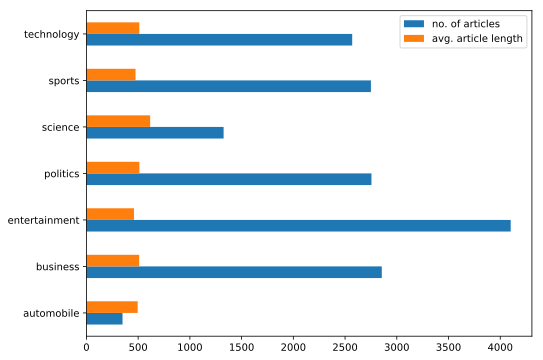

In [65]:
# number of articles in a category and avg article length in each category

temp_df = pd.DataFrame({"no. of articles": data_df['category'].value_counts(),
                        "avg. article length": data_df.groupby('category')['source_article_len'].mean()}
                      )

temp_df.plot.barh(figsize= (8,6))
                       

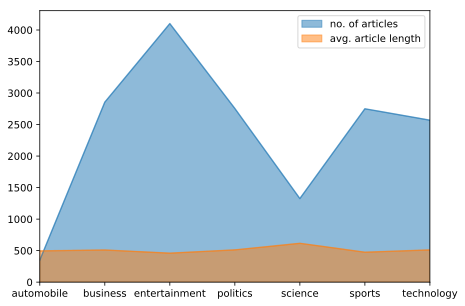

In [71]:
#  Alpha value is set to 0.5 unless otherwise specified

temp_df.plot.area(stacked = False, figsize = (7,5))

In [42]:
# category count
data_df['category'].value_counts()

entertainment    4101
business         2855
politics         2755
sports           2750
technology       2569
science          1326
automobile        349
Name: category, dtype: int64

In [12]:
# dataset
data = data_df[data_df['source_article']!='NA'][['source_article', 'category']]
data.head(20)

,source_article,category
0,Neha Dhupia: I once caught a woman filming me ...,entertainment
1,‘Nation is obsessed with Amitabh Bachchan’: R ...,entertainment
2,NASA hopes to hand the International Space Sta...,science
3,We have known each other since our teenage yea...,entertainment
4,MIT researchers are now 3D-printing glass\nWhi...,technology
5,Japan Launches Observatory To Study Black Hole...,science
6,‘Show respect to Tricolour’: BJP leader tweets...,politics
7,Navjot Singh Sidhu has more love and respect i...,politics
8,Mann Ki Baat highlights: PM Modi focuses on Na...,science
9,"Ikea to enter Indian market in July, may trigg...",business


In [22]:
print("**Article:", data.loc[777, 'source_article'])
print("\n**Category:", data.loc[777, 'category'])

**Article: Arsenal to talk to players seen apparently inhaling nitrous oxide
Arsenal have responded to footage showing some of their players apparently inhaling nitrous oxide in a London nightclub by saying those involved will be spoken to and reminded of their responsibilities.

A number of players, including Mesut Özil, Pierre-Emerick Aubameyang, Alexandre Lacazette and Mattéo Guendouzi, appear to inhale nitrous oxide – also referred to as laughing gas or hippy crack – in footage published by the Sun.

Arsenal’s Unai Emery tells Mattéo Guendouzi: get your hair cut
 Read more

The incident is reported to have taken place in August, before the start of the season. A club spokesperson said: “The players will be spoken to about this and reminded of their responsibilities as representatives of the club.”

Nitrous oxide, which is used legitimately in medicine, dentistry and catering, is legal, although it is illegal to supply or import it for personal use.

It can make users feel euphoric 

In [17]:
# input and label
x = data['source_article']
y = data['category']

x.shape, y.shape

((16705,), (16705,))